In [1]:
# Initial imports and dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
#reading csv file
file_path = Path("Resources/myopia.csv")
myopia = pd.read_csv(file_path)
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#removing MYOPIC column
myopia_test = myopia.drop(['MYOPIC'], axis=1)
myopia_test.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
#standardizing dataset
myopia_scaled = StandardScaler().fit_transform(myopia_test)

In [5]:
#apply dimensionality reduction using PCA
pca = PCA(n_components=.90)
myopia_pca = pca.fit_transform(myopia_scaled) 

In [6]:
#transform PCA data to a dataframe
df_myopia_pca = pd.DataFrame(myopia_pca, columns = [f'PC{i}' for i in range(1,11)])
df_myopia_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
5,-0.352605,2.019888,-0.006843,-1.415177,-0.759984,1.157975,0.740059,0.164110,1.250569,-1.401525
6,-0.335692,1.403542,-0.082447,-0.102080,-1.401532,0.737557,1.706826,-0.069387,0.388999,0.102258
7,-1.456695,-0.991883,1.001543,-0.731960,0.022628,-0.118257,-0.486553,-0.102932,-1.067021,-0.118232
8,-0.436809,-1.175823,2.003959,-0.223928,1.292552,1.011184,0.273048,0.377192,-0.145739,0.087149
9,-0.018199,0.552820,0.634571,-1.842772,-1.452535,-0.943217,0.103679,-1.057678,-0.794826,0.819197


In [7]:
#Explained Variance
pca.explained_variance_ratio_ 

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [8]:
#initialize tsne model
tsne = TSNE(learning_rate='auto')

In [9]:
#reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\brevi\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


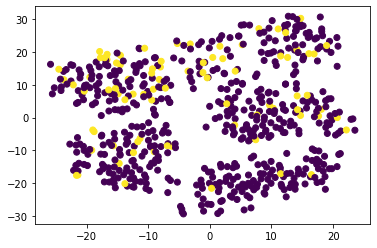

In [10]:
#plotting t-SNE output
myopia_test["x"] = tsne_features[:,0]
myopia_test["y"] = tsne_features[:,1]
myopia_test["myopia"] = myopia["MYOPIC"]

plt.scatter(myopia_test["x"], myopia_test["y"], c=myopia_test["myopia"])
plt.show()